In [1]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
import random
import sys
from scipy.spatial import distance
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1
import matplotlib.pyplot as plt



LARGER_DISTANCE = sys.maxsize
TALK = True # TALK = True, imprime resultados parciales

In [2]:
numericalDF = pd.read_csv('numericalData.csv')
columnas = ['directores','criticas','duracion','genero','actores1','actores2','actores3','rostros',
            'scores','gross','budget']
del numericalDF['Unnamed: 0']

for i in columnas:
    numericalDF.loc[numericalDF[i] == 0, i] = numericalDF[i].mean()
X = numericalDF.head(20)
numericalDF.head()

,directores,criticas,duracion,genero,actores1,actores2,actores3,rostros,scores,gross,budget
0,0.024778,0.003295,0.011543,0.007769,0.034020,0.029215,0.027567,0.007924,0.014223,0.000016,7.773335e-08
1,0.031655,0.001073,0.012825,0.011654,0.015347,0.000761,0.027559,0.028946,0.013576,0.000002,2.522814e-03
2,0.031642,0.000996,0.009747,0.018128,0.034004,0.029206,0.027551,0.007924,0.013576,0.007426,9.893336e-08
3,0.001505,0.003295,0.005515,0.022013,0.033988,0.029196,0.027543,0.005789,0.016162,0.007426,2.522814e-03
4,0.031629,0.000077,0.011158,0.011654,0.024448,0.029186,0.006778,0.011579,0.016593,0.007426,2.522814e-03


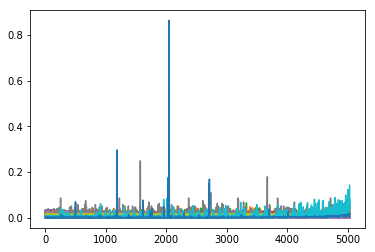

In [3]:
DATA_SET = numericalDF.values
DATA_LEN = len(DATA_SET)
plt.plot(DATA_SET)
plt.show()
class DataPoint:
    def __init__(self, p):
        self.value = p[:]
        
    def set_value(self, p):
        self.value = p
    
    def get_value(self):
        return self.value
    
    def set_cluster(self, cluster):
        self.cluster = cluster
    
    def get_cluster(self):
        return self.cluster

data = []
def initialize_dataset():
    for i in range(DATA_LEN):
        point = DataPoint(DATA_SET[i])
        point.set_cluster(None)
        data.append(point)
    return
initialize_dataset()
NUM_CLUSTERS = 3

In [4]:
SAMPLING_METHOD = 1 

centroids = []
def initialize_centroids():
    if (TALK) : 
        print("Centroides inicializados en:")
    for c in range(NUM_CLUSTERS):
        if (SAMPLING_METHOD == 0) :
            which = random.randint(0,DATA_LEN-1)
        elif (SAMPLING_METHOD == 1):
            which = c
        else :
            which = DATA_LEN-1 - c
                
        centroids.append(list(DATA_SET[which]))
        if (TALK) : 
            print(centroids[c])        
    if (TALK) : 
        print()
    
    return

# --------------------------
# Inicializar los centroides
initialize_centroids()

Centroides inicializados en:
[0.024777855766521698, 0.0032946427378127371, 0.011542830863979774, 0.0077693096886551514, 0.03402008725059831, 0.029215390682287838, 0.027566914529451692, 0.0079240093608800299, 0.014222819070406156, 1.5945547294475328e-05, 7.7733351917473585e-08]
[0.031655459844496019, 0.0010726743797529841, 0.012825367626644192, 0.011653964532982728, 0.015347163824065809, 0.00076121895247385849, 0.027559087466836853, 0.028946257900327749, 0.013576327294478606, 1.953947928894016e-06, 0.0025228142931399203]
[0.031642259068914484, 0.00099605478119919942, 0.0097472793962495863, 0.018128389273528688, 0.034003864033025306, 0.029205754999345124, 0.027551260404222015, 0.0079240093608800299, 0.013576327294478606, 0.0074260048110705605, 9.8933356985875462e-08]



In [5]:
def update_clusters():
    changed = False
    
    for i in range(DATA_LEN):
        minDistance = LARGER_DISTANCE
        currentCluster = 0
        
        for j in range(NUM_CLUSTERS):
            dist = distance.euclidean(data[i].get_value(), centroids[j])
            if(dist < minDistance):
                minDistance = dist
                currentCluster = j
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            changed = True
            
    members = [0] * NUM_CLUSTERS
    for i in range(DATA_LEN):
        members[data[i].get_cluster()] += 1
    
    if (TALK) : 
        for j in range(NUM_CLUSTERS):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
            
    return changed

# --------------------------
# Actualizar los clusters
KEEP_WALKING = update_clusters()

El cluster  0  incluye  1395 miembros.
El cluster  1  incluye  3212 miembros.
El cluster  2  incluye  429 miembros.



In [6]:
while(KEEP_WALKING):
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        if (TALK) : 
            print ("No más cambios.")

El cluster  0  incluye  1395 miembros.
El cluster  1  incluye  3212 miembros.
El cluster  2  incluye  429 miembros.

No más cambios.
